In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_loan = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_loan.shape

(614, 13)

Dataset Contains 614 rows and 13 coulmns

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Observations :

* As per the problem statement need to predict the Loan_Status problem seems classification.
* Dataset has no null values.
* There are many columns where some values are 'zero' which we can not feed to our model we have to deal with it also.
* If we check the mean values in description we can see the variations is higher among the columns.
* 'Loan_ID' is not useful we can drop it.
* There is a few object columns which we have to convert into numeric.

## Backup Data:

In [8]:
duplicate_df = df_loan.copy()

### NaN Treatment :

In [9]:
df_loan['Gender'].value_counts() # checking values counts of Gender

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df_loan['Dependents'].value_counts() #checking values counts of Dependents

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df_loan['Self_Employed'].value_counts()  #checking values counts of Self_Employed

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df_loan['LoanAmount'].value_counts()  #checking values counts of LoanAmount

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [13]:
df_loan['Loan_Amount_Term'].value_counts()  #checking values counts of Loan_Amount_Term

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df_loan['Credit_History'].value_counts() #checking values counts of Credit_History

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
from sklearn.impute import SimpleImputer  #using simple imputer to fill the null value

In [16]:
simple_imp = SimpleImputer(missing_values=np.nan,strategy='mean') # strategy using mean for 2 continuous value columns 

In [17]:
df_loan[['LoanAmount','Loan_Amount_Term']]=simple_imp.fit_transform(df_loan[['LoanAmount','Loan_Amount_Term']])

In [18]:
df_loan[['LoanAmount','Loan_Amount_Term']].isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
dtype: int64

In [19]:
# strategy using mode for object value columns 
simple_imp_for_object = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [20]:
df_loan[['Gender','Married','Dependents','Self_Employed','Credit_History']]=simple_imp_for_object.fit_transform(df_loan[['Gender','Married','Dependents','Self_Employed','Credit_History']])

In [21]:
df_loan[['Gender','Married','Dependents','Self_Employed','Credit_History']].isnull().sum()

Gender            0
Married           0
Dependents        0
Self_Employed     0
Credit_History    0
dtype: int64

In [22]:
df_loan.isnull().sum().sum() # there is no null values in data set now

0

## Exploratry Data Analysis(EDA)

In [23]:
sns.set(style='darkgrid') # using sns grid function to set grid

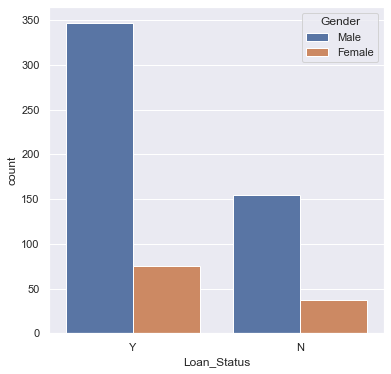

In [24]:
#checking the observations of Loan_Status
plt.figure(figsize=(6,6))
sns.countplot(x='Loan_Status',data=df_loan,hue='Gender')
#plt.xticks(rotation=70)

As per above observation we can say our data is unbalanced.which we have to deal with futher.

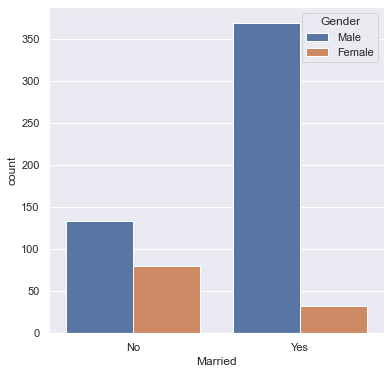

In [25]:
# checking the observation of Married
plt.figure(figsize=(6,6))
sns.countplot(x='Married',data=df_loan,hue='Gender')

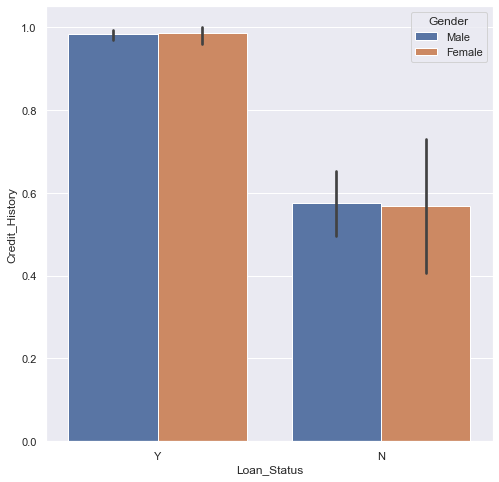

In [26]:
#checking the relation between Loan_Status and Credit_History
plt.figure(figsize=(8,8))
sns.barplot(x='Loan_Status',y='Credit_History',data=df_loan,hue='Gender')

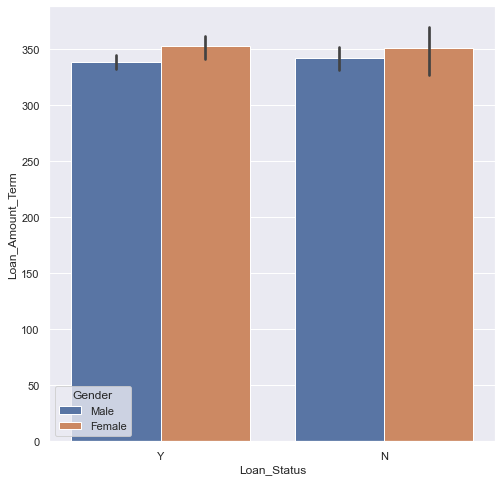

In [27]:
#checking the relation between Loan_Status and Loan_Amount_Term
plt.figure(figsize=(8,8))
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df_loan,hue='Gender')

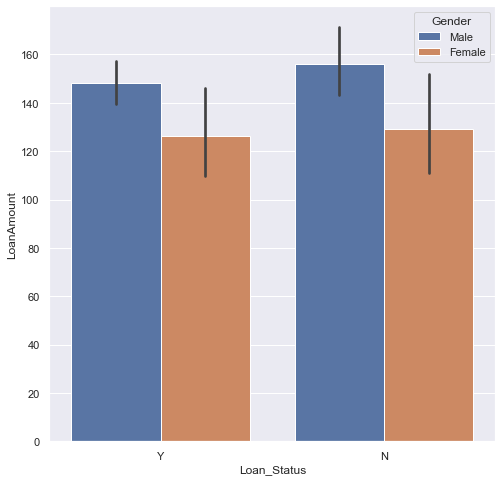

In [28]:
#checking the relation between Loan_Status and LoanAmount
plt.figure(figsize=(8,8))
sns.barplot(x='Loan_Status',y='LoanAmount',data=df_loan,hue='Gender')

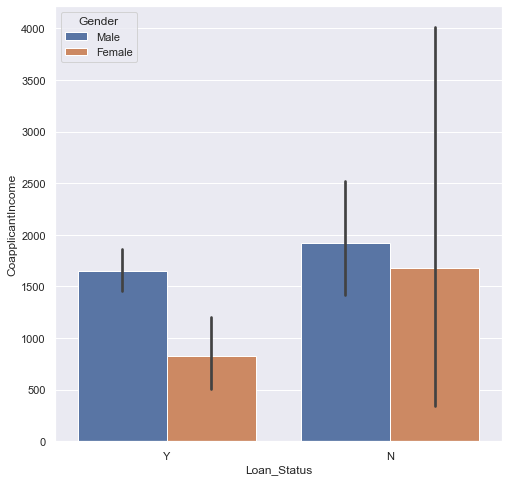

In [29]:
#checking the relation between Loan_Status and CoapplicantIncome
plt.figure(figsize=(8,8))
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df_loan,hue='Gender')

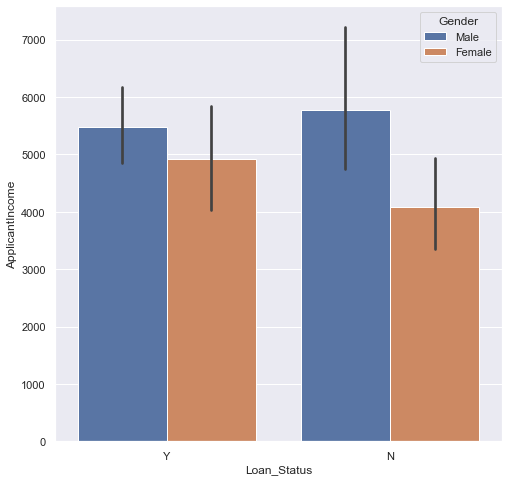

In [30]:
#checking the relation between Loan_Status and ApplicantIncome
plt.figure(figsize=(8,8))
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df_loan,hue='Gender')

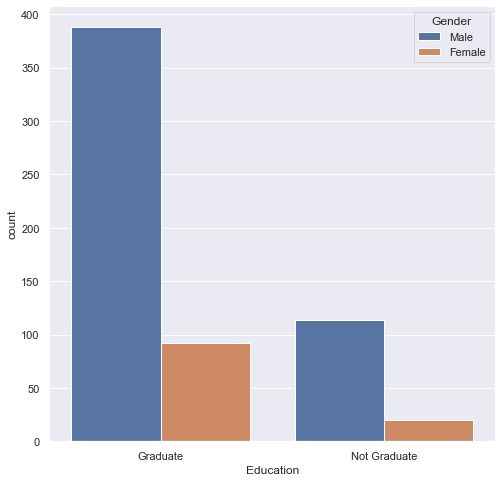

In [31]:
#checking the counts of observations in Education as per the gender
plt.figure(figsize=(8,8))
sns.countplot(x='Education',data=df_loan,hue='Gender')

In [32]:
#getting numerical columns for test data
df_numeric = df_loan.select_dtypes(include=['int','float'])
df_numeric.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [33]:
corr = df_loan.corr() # checking the corelation matrics

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

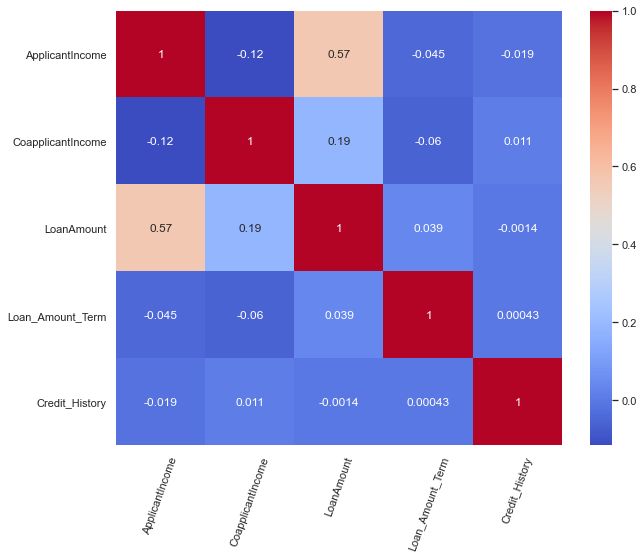

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.xticks(rotation=70)

### Outliars Detection & Removel :

In [35]:
df_numeric = df_loan.select_dtypes(include=['int64','float64'])
df_numeric.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

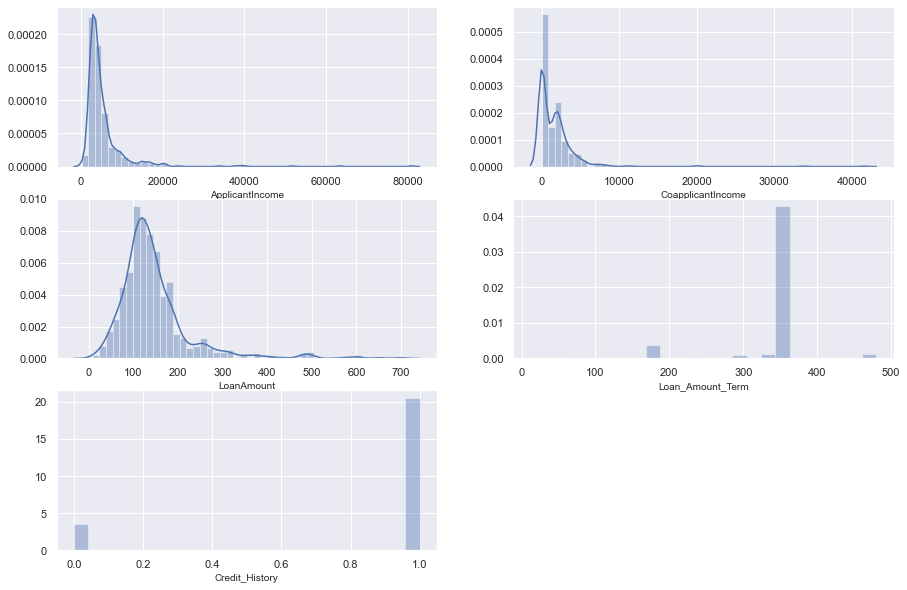

In [36]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in df_numeric:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        sns.distplot(df_numeric[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [37]:
from scipy.stats import zscore

In [38]:
z_score = zscore(df_loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_values = np.abs(z_score)
filtter_values = (abs_values<2).all(axis=1)
df_loan = df_loan[filtter_values]

In [39]:
df_loan.shape

(577, 13)

In [40]:
df_numeric1 = df_loan.select_dtypes(include=['int64','float64'])
df_numeric1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

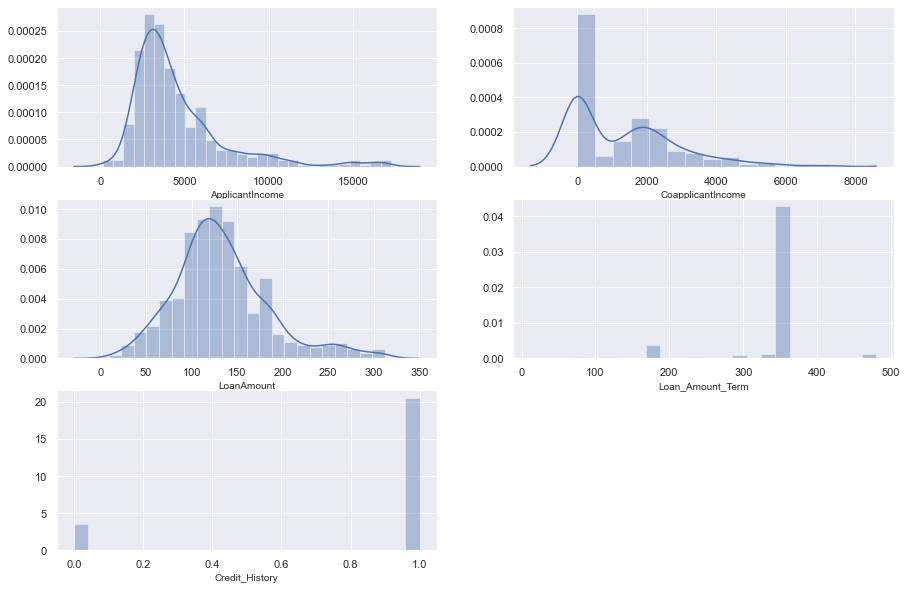

In [41]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in df_numeric1:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        sns.distplot(df_numeric1[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

Now data is seems normally distributed.

### Encoding Categorical Variables:

In [42]:
# In the 'Dependents' feature thre is '+3' we can replace it and convert into the integer 
df_loan['Dependents'] = df_loan['Dependents'].replace('3+','3').astype('int') 

In [43]:
df_loan['Dependents'].value_counts()

0    345
2     96
1     93
3     43
Name: Dependents, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder  # using label encoder for encoding

In [45]:
le = LabelEncoder()

In [46]:
df_loan.Gender=le.fit_transform(df_loan.Gender)
df_loan.Married=le.fit_transform(df_loan.Married)
df_loan.Education=le.fit_transform(df_loan.Education)
df_loan.Self_Employed=le.fit_transform(df_loan.Self_Employed)
df_loan.Property_Area=le.fit_transform(df_loan.Property_Area)
df_loan.Loan_Status=le.fit_transform(df_loan.Loan_Status)

In [47]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            577 non-null    object 
 1   Gender             577 non-null    int32  
 2   Married            577 non-null    int32  
 3   Dependents         577 non-null    int32  
 4   Education          577 non-null    int32  
 5   Self_Employed      577 non-null    int32  
 6   ApplicantIncome    577 non-null    int64  
 7   CoapplicantIncome  577 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   577 non-null    float64
 10  Credit_History     577 non-null    float64
 11  Property_Area      577 non-null    int32  
 12  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 47.3+ KB


### Feature Selection :

In [48]:
from sklearn.ensemble import ExtraTreesClassifier #using 'ExtraTreesClassifier' for feature selection

In [49]:
X_feature = df_loan.drop(['Loan_Status','Loan_ID'],axis=1)
y_feature = df_loan['Loan_Status']

In [50]:
model = ExtraTreesClassifier()

In [51]:
model.fit(X_feature,y_feature)

ExtraTreesClassifier()

In [52]:
print(model.feature_importances_)

[0.02045076 0.02261311 0.06104827 0.02055601 0.02090843 0.17474365
 0.1010334  0.170987   0.05330031 0.30146667 0.05289239]


In [53]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

Gender               0.020451
Married              0.022613
Dependents           0.061048
Education            0.020556
Self_Employed        0.020908
ApplicantIncome      0.174744
CoapplicantIncome    0.101033
LoanAmount           0.170987
Loan_Amount_Term     0.053300
Credit_History       0.301467
Property_Area        0.052892
dtype: float64

As per feature selection technique we can see 'ApplicantIncome ','CoapplicantIncome','LoanAmount','Credit_History' these are the most imortant features in oder to predict.

## Dealing with Imbalanced Data :

In [54]:
from sklearn.utils import resample # using resample method

In [55]:
minority = df_loan[df_loan.Loan_Status==0]
majority = df_loan[df_loan.Loan_Status==1]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
df_loan = pd.concat([minority_upsample, majority], axis=0)

In [56]:
df_loan['Loan_Status'].value_counts()

1    399
0    399
Name: Loan_Status, dtype: int64

#### Spliting the data into dependent and independent variables

In [57]:
X = df_loan.drop(['Loan_Status','Loan_ID'],axis=1)
y = df_loan['Loan_Status']

In [58]:
print("The Shape Of X",X.shape)
print("The Shape Of Y",y.shape)

The Shape Of X (798, 11)
The Shape Of Y (798,)


### Model Building :

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
x_scaler = scaler.fit_transform(X)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

Importing libraries for model building......!

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [65]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[21:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [66]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.7140468227424749
knn classification score 0.81438127090301
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8110367892976589
svm classification score 0.8060200668896321
gdboost classification score 0.919732441471572
xgboost classification score 1.0


## Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [67]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [68]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[57 37]
 [16 90]]


In [69]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[71 23]
 [30 76]]


In [70]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[90  4]
 [ 9 97]]


In [71]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[90  4]
 [ 9 97]]


In [72]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[70 24]
 [13 93]]


In [73]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[63 31]
 [14 92]]


In [74]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[75 19]
 [15 91]]


In [75]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[92  2]
 [ 9 97]]


In [76]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.78      0.61      0.68        94
           1       0.71      0.85      0.77       106

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

 knn classification_report 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        94
           1       0.77      0.72      0.74       106

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200

 dt classification_report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        94
           1       0.96      0.92      0.94       106

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93

### ROC AND AUC :

for performance measurement..........!

In [77]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [78]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7277197912484946
0.7361501405058208
0.9362705740666399
0.9362705740666399
0.8110196708149339
0.7690686471296668
0.828181453231634
0.9469088719389803


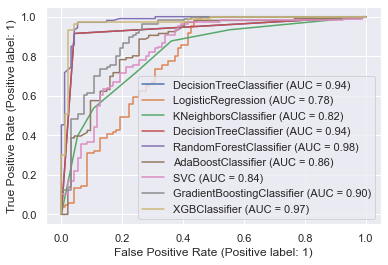

In [79]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

### CrossValidation :

In [80]:
from sklearn.model_selection import KFold,cross_val_score

In [81]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [82]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5))
print("Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=5))
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5))

Cross validation score for lr model => [0.68125    0.73125    0.76875    0.72955975 0.66037736]
Cross validation score for knn model => [0.65625    0.6        0.61875    0.5408805  0.59748428]
Cross validation score for dt model => [0.88125    0.8375     0.86875    0.83018868 0.8490566 ]
Cross validation score for rf model => [0.9375     0.91875    0.925      0.91194969 0.89308176]
Cross validation score for adb model => [0.73125    0.7625     0.80625    0.7672956  0.76100629]
Cross validation score for SVM model => [0.5125     0.475      0.525      0.50314465 0.54716981]
Cross validation score for gdboost model => [0.80625    0.7875     0.85       0.80503145 0.85534591]
[21:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:46]

In [83]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Mean of Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Mean of Cross validation score for lr model => 0.7142374213836479
Mean of Cross validation score for knn model => 0.6026729559748427
Mean of Cross validation score for dt model => 0.8596069182389936
Mean of Cross validation score for rf model => 0.9235534591194969
Mean of Cross validation score for adb model => 0.7656603773584906
Mean of Cross validation score for SVM model => 0.5125628930817611
Mean of Cross validation score for gdboost  model => 0.8208254716981133
[21:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

Our data was unbalanced and as f1-score and crossvalidation i found gdboost model would be a good predictor for our problem.Now i am using the hperparameter tuning to check chances of increment in accuracy.

### HyperParameter Tuning !

In [84]:
from sklearn.model_selection import GridSearchCV

In [98]:
gdboost.get_params().keys()  # to check the parameters

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [100]:
parm_grid  = {'loss' : ['deviance', 'exponential'],
              'learning_rate' :[0.1,0.2],
              'n_estimators' :[50,100,200],
              'subsample' :[1.0,2.0,3.0]}


parm_grid

{'loss': ['deviance', 'exponential'],
 'learning_rate': [0.1, 0.2],
 'n_estimators': [50, 100, 200],
 'subsample': [1.0, 2.0, 3.0]}

In [101]:
gridsearch = GridSearchCV(gdboost, param_grid = parm_grid , cv=5)

In [102]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 200],
                         'subsample': [1.0, 2.0, 3.0]})

In [103]:
gridsearch.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'n_estimators': 200,
 'subsample': 1.0}

In [104]:
gdboost_tune=GradientBoostingClassifier(learning_rate=0.2,loss='deviance',n_estimators=200,subsample=1.0)

In [105]:
gdboost.fit(X_train,y_train)

GradientBoostingClassifier()

In [106]:
gdboost.score(X_train,y_train)

0.919732441471572

In [109]:
gdboost_tune_yprad = gdboost.predict(X_test)

In [111]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_tune_yprad)
print("confusion matrix for svm_model",'\n',gdboost_conf_mat)

confusion matrix for svm_model 
 [[75 19]
 [15 91]]


In [113]:
gdboost_report = classification_report(y_test,gdboost_tune_yprad)
print(" svm classification_report" ,'\n',gdboost_report)

 svm classification_report 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        94
           1       0.83      0.86      0.84       106

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In the hyperparameter tuning we are getting almost same score.

### Saving Model :

In [114]:
import pickle 

In [115]:
loan_appliaction = 'loan_appliaction_status.pickle'

In [116]:
pickle.dump(gdboost,open(loan_appliaction,'wb'))

### Thank You !